# Modeling - Rd. 1
---

This notebook contains my first round of modeling using a handful of models from the sklearn library that I deemed appropriate for Natural Language Processing (NLP).

## Imports

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Text Processing
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### Load in data

In [2]:
df = pd.read_csv('../data/clean_mbti_df.csv')
df.head()

,type,posts,no. of. words
0,INFJ,enfp intj moments sportscenter plays...,344
1,ENTP,finding lack these posts very alarming ...,639
2,INTP,good course which know thats bles...,215
3,INTJ,dear intp enjoyed conversation other e...,611
4,ENTJ,youre fired thats another silly misconcepti...,315


## Feature Engineering

### Splitting data into X and y

Binarizing target classes using LabelEncoder to convert categorical variables into a numeric form. Can very well accomplish using .map, .getdummies, .where functions. Utilizing a new tool to show yet another method of binarizing variables.

#### Binarizing target variables

In [3]:
# Binarizing MBTI personality types(target feature) using LabelEncoder

encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['type'])

# Defining y (target feature)
y = df['class']

In [4]:
# Making sure that label encoding successully binarized type column

print(len(df['class'].unique()))
print(len(df['class'].unique()))


16
16


In [5]:
df.head(10)

,type,posts,no. of. words,class
0,INFJ,enfp intj moments sportscenter plays...,344,8
1,ENTP,finding lack these posts very alarming ...,639,3
2,INTP,good course which know thats bles...,215,11
3,INTJ,dear intp enjoyed conversation other e...,611,10
4,ENTJ,youre fired thats another silly misconcepti...,315,2
5,INTJ,science perfect scientist claims tha...,189,10
6,INFJ,cant draw nails haha those were done pr...,775,8
7,INTJ,tend build collection things desktop th...,118,10
8,INFJ,sure thats good question distinction betw...,422,8
9,INTP,this position where have actually pe...,106,11


As you can see, the label encoder successfully gave numeric values to to each personality type and created a target column labeled 'class'.

In [6]:
# Pre-vectorized shape
df.shape

(8436, 4)

#### CountVectorizer

In [7]:
# Preparing posts for model by vectorzing and filtering stop-words

cvec = CountVectorizer(stop_words='english')

X = cvec.fit_transform(df['posts'])

In [8]:
# Post-vectorized shape
X.shape

(8436, 98546)

Dimensionality has increased after vectorization

---

## Modeling

In [9]:
# Use this bit of code to prevent long error messages, but be mindful that you may not see a message worth looking into when debugging code

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, stratify=y, random_state=42)

print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(6748, 98546) (6748,) (1688, 98546) (1688,)


In [11]:
# Starting an accuracies list here so I can compare the accuracies of all models by the end of the first round

accuracies = {}


### Logistic Regression
---

In [12]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Logistic Regression'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.40      0.22      0.29        36
           1       0.45      0.43      0.44       127
           2       0.39      0.29      0.33        45
           3       0.50      0.45      0.47       133
           4       0.80      0.50      0.62         8
           5       0.50      0.11      0.18         9
           6       0.00      0.00      0.00         8
           7       0.25      0.06      0.09        18
           8       0.53      0.61      0.57       287
           9       0.55      0.67      0.60       354
          10       0.50      0.56      0.53       215
          11       0.52      0.52      0.52       256
          12       0.50      0.33      0.40        33
          13       0.52      0.28      0.37        53
          14       0.52      0.30      0.38        40
          15       0.61      0.50      0.55        66

    accuracy                           0.52      1688
   macro avg       0.47   

In [13]:
logreg_train = logreg.score(X_train, y_train)

In [14]:
logreg_test = logreg.score(X_test, y_test)

In [15]:
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')

Training Accuracy:  0.9997036158861885
Testing Accuracy:  0.5195497630331753


### Multinomial Naive Bayes
---

In [16]:
# Instantiate the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions
preds = nb.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Multinomial Naive bayes'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00        45
           3       0.50      0.01      0.01       133
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.43      0.49      0.46       287
           9       0.33      0.86      0.48       354
          10       0.55      0.24      0.33       215
          11       0.41      0.55      0.47       256
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        53
          14       0.00      0.00      0.00        40
          15       0.50      0.02      0.03        66

    accuracy                           0.38      1688
   macro avg       0.17   

In [17]:
nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

In [18]:
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')

Training Accuracy:  0.6499703615886189
Testing Accuracy:  0.3791469194312796


### K Nearest Neighbors Classifier
---

In [19]:
# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions
preds = knn.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['KNN'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.05      0.19      0.08        36
           1       0.12      0.42      0.18       127
           2       0.08      0.02      0.04        45
           3       0.13      0.16      0.15       133
           4       0.00      0.00      0.00         8
           5       0.12      0.11      0.12         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.25      0.34      0.29       287
           9       0.31      0.33      0.32       354
          10       0.33      0.10      0.16       215
          11       0.58      0.10      0.17       256
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        53
          14       0.60      0.07      0.13        40
          15       0.36      0.08      0.12        66

    accuracy                           0.21      1688
   macro avg       0.18   

In [20]:
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

In [21]:
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')

Training Accuracy:  0.46147006520450506
Testing Accuracy:  0.20912322274881517


### Random Forest Classifier
---

In [22]:
# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Model evaluation
report = classification_report(y_test, preds)

# Append scores to accuracies list
accuracy = accuracy_score(y_test, preds)
accuracies['Random Forest'] = accuracy* 100.0 

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      0.06      0.11       127
           2       0.00      0.00      0.00        45
           3       0.42      0.08      0.13       133
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.42      0.51      0.46       287
           9       0.32      0.86      0.47       354
          10       0.58      0.35      0.43       215
          11       0.48      0.43      0.45       256
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        53
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        66

    accuracy                           0.39      1688
   macro avg       0.17   

In [23]:
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

In [24]:
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

Training Accuracy:  1.0
Testing Accuracy:  0.38566350710900477


## Model Evaluation
---

In [25]:
# Model Scores
print(" Logistic Regression ".center(18, "="))
print(f'Training Accuracy:  {logreg_train}')
print(f'Testing Accuracy:  {logreg_test}')
print()
print(" Multinomial Naive Bayes ".center(18, "="))
print(f'Training Accuracy:  {nb_train}')
print(f'Testing Accuracy:  {nb_test}')
print()
print(" K Nearest Neighbors Classifier ".center(18, "="))
print(f'Training Accuracy:  {knn_train}')
print(f'Testing Accuracy:  {knn_test}')
print()
print(" Random Forest Classifier ".center(18, "="))
print(f'Training Accuracy:  {rf_train}')
print(f'Testing Accuracy:  {rf_test}')

 Logistic Regression 
Training Accuracy:  0.9997036158861885
Testing Accuracy:  0.5195497630331753

 Multinomial Naive Bayes 
Training Accuracy:  0.6499703615886189
Testing Accuracy:  0.3791469194312796

 K Nearest Neighbors Classifier 
Training Accuracy:  0.46147006520450506
Testing Accuracy:  0.20912322274881517

 Random Forest Classifier 
Training Accuracy:  1.0
Testing Accuracy:  0.38566350710900477


In [26]:
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])
accuracies_df

,Accuracies(%)
Logistic Regression,51.954976
Multinomial Naive bayes,37.914692
KNN,20.912322
Random Forest,38.566351


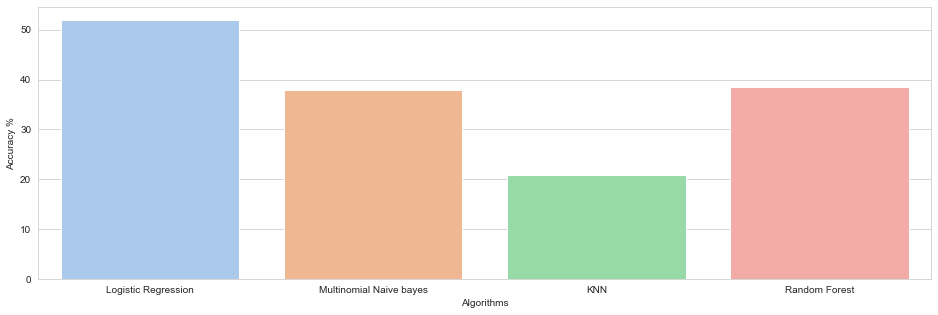

In [34]:
#colors = ["salmon", "red", "pink", "lavender"]
# palette='pastel'
sns.set_style("whitegrid")
#sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')
plt.show()